# LaViMoAn (Lava Visual Motion Analysis)

lavimoan style $\Rightarrow$
```python
print "a_la_lavimoan"
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
cap = cv2.VideoCapture("MVI_2606.MOV") # Analizar el video ./MVI_2606.MOV
t_seg = 3*60+10 # Analiza desde el tiempo = 190 segs
cap.set(cv2.CAP_PROP_POS_MSEC,t_seg*1000)

True

In [3]:
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY) # Lee frame1 y nombrar prvs

In [4]:
ret, frame2 = cap.read()
siguiente = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY) # Lee frame2 y nombrarlo siguiente

In [5]:
# Prepara matrices de coordenadas (base para manipular 'indices de pixeles)
x = np.arange(np.shape(prvs)[1]) # num de cols
y = np.arange(np.shape(prvs)[0]) # num de fils
X,Y = np.meshgrid(x,y)

In [6]:
#  Calcular Optical Flow para obtener campo vectorial de desplazamientos
#flow = cv2.calcOpticalFlowFarneback(prvs,siguiente, None, 0.5, 3, 15, 3, 7, 1.2, 0)
flow = cv2.calcOpticalFlowFarneback(prvs[::-1],siguiente[::-1], None, pyr_scale=0.5,
                                    levels=1,
                                    winsize=25,
                                    iterations=1,
                                    poly_n=5,
                                    poly_sigma=1.1,
                                    flags = cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
U = flow[...,0]
V = flow[...,1]

# Si este codigo est'a dentro de un ciclo for, usar: prvs = siguiente
# y las siguientes dos lineas fuera del ciclo for
cap.release()
cv2.destroyAllWindows()

# Exploremos lo que tenemos hasta ahora:

(1080, 1920)

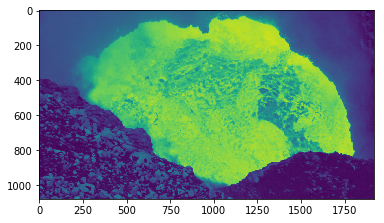

In [9]:
plt.imshow(prvs)
np.shape(U)
#np.shape(V)

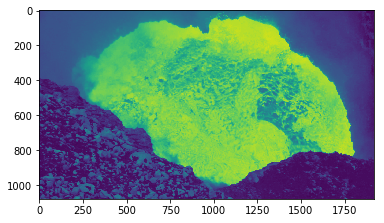

In [10]:
plt.imshow(siguiente)

In [11]:
# Recortar una ventana
ventanayfilsi = 100 # inicio (esquina de ventana inf izq)
ventanaxcolsi = 400 # inicio (esquina de ventana inf izq)
ventanayfils = 800
ventanaxcols = 1400 # tamanio de ventana
U = U[ventanayfilsi:ventanayfilsi+ventanayfils,ventanaxcolsi:ventanaxcolsi+ventanaxcols]
V = V[ventanayfilsi:ventanayfilsi+ventanayfils,ventanaxcolsi:ventanaxcolsi+ventanaxcols]

Text(0,0.5,'rowycoor')

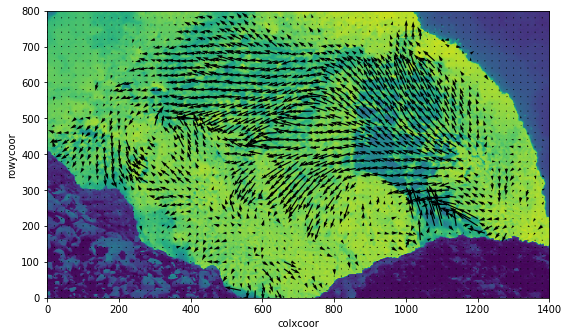

In [12]:
# Grafica campo de desplazamientos (U,V)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
prvstemp = prvs[::-1]
ax.imshow(prvstemp[ventanayfilsi:ventanayfilsi+ventanayfils,ventanaxcolsi:ventanaxcolsi+ventanaxcols])
plt.quiver(X[0:ventanayfils:20,0:ventanaxcols:20],
           Y[0:ventanayfils:20,0:ventanaxcols:20],U[::20,::20],V[::20,::20])
plt.gca().invert_yaxis()
plt.xlabel('colxcoor')
plt.ylabel('rowycoor')

In [13]:
# reservar espacio para guardar 2*vor y 2*div
dosvort = np.zeros((ventanayfils-2, ventanaxcols-2))
dosdive = np.zeros((ventanayfils-2, ventanaxcols-2))

In [14]:
# calcular divergencia y vorticidad
for rowcoory in range(1,ventanayfils-1):
	for colcoorx in range(1,ventanaxcols-1):
		dosdvdx = V[rowcoory,colcoorx+1] - V[rowcoory,colcoorx-1]
		dosdudy = U[rowcoory+1,colcoorx] - U[rowcoory-1,colcoorx]
		dosdvdy = V[rowcoory+1,colcoorx] - V[rowcoory-1,colcoorx]
		dosdudx = U[rowcoory,colcoorx+1] - U[rowcoory,colcoorx-1]
		dosvort[rowcoory-1,colcoorx-1] = (dosdvdx - dosdudy)#/2 comentado para escalar: 2x la vort
		dosdive[rowcoory-1,colcoorx-1] = (dosdudx + dosdvdy)#/2

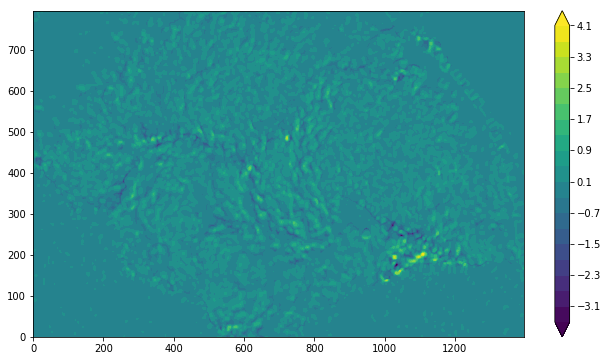

In [15]:
# Grafica la divergencia (2 veces la divergencia debido a '#/2' en celda anterior)
fig = plt.figure(figsize=(11,6))
ax2 = fig.add_subplot(111)
cf2 = ax2.contourf(dosdive, np.arange(-3.5, 4.3, .4),
                    extend='both')
cbar2 = plt.colorbar(cf2)
#plt.quiver(X[0:ventanayfils:20,0:ventanaxcols:20],
#           Y[0:ventanayfils:20,0:ventanaxcols:20],U[::20,::20],V[::20,::20])

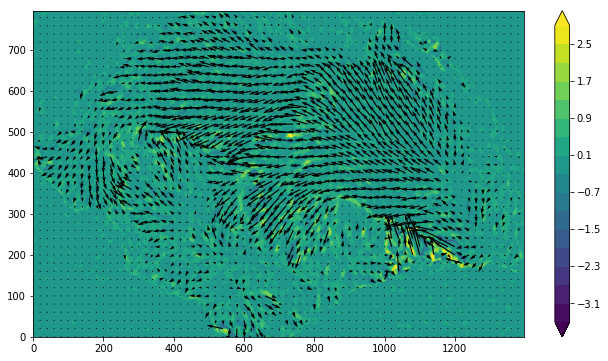

In [16]:
# Graficar la vorticidad
fig = plt.figure(figsize=(11,6))
ax3 = fig.add_subplot(111)
cf3= plt.contourf(dosvort,np.arange(-3.5, 3, .4),
                   extend='both')
cbar3 = plt.colorbar(cf3)
plt.quiver(X[0:ventanayfils:20,0:ventanaxcols:20],
           Y[0:ventanayfils:20,0:ventanaxcols:20],U[::20,::20],V[::20,::20])

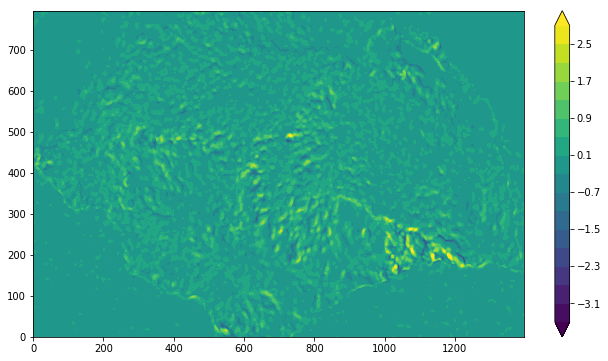

In [17]:
# Graficar la vorticidad
fig = plt.figure(figsize=(11,6))
ax3 = fig.add_subplot(111)
cf3= plt.contourf(dosvort,np.arange(-3.5, 3, .4),
                   extend='both')
cbar3 = plt.colorbar(cf3)